## 세계 테러 데이터 분석 

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image

### 데이터 불러오기

In [2]:
terror=pd.read_csv('../data/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1', low_memory=False)

terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror['casualty']=terror['Killed']+terror['Wounded']
terror.head(3)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualty
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0


### 문제 1

``` 
데이터 전체 기간에서 테러의 숫자를 연도별로 집계하여 연도별 테러 숫자를 시각화 하시오.

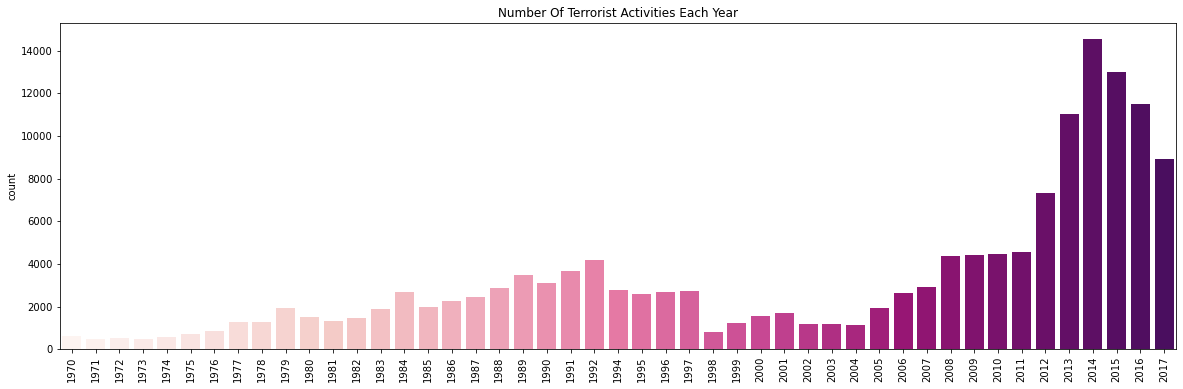

In [55]:
plt.figure(figsize=(20,6))
sns.countplot('Year', data=terror, palette='RdPu')
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.xlabel('')
plt.show()

#### 전세계 테러 추이 분석
- 전세계 테러는 1970년대부터 1990년대 초반까지 지속적인 증가추세를보이다가 1990년대 후반에 급감한다. 
- 전세계 테러는 2005년을 기점으로 다시 증가하기 시작하며 2012년~2014년 사이에 급증하는 추세를 보인다. 

##### 세계 이슈 분석 
- 2001년 9/11 테러 이후 서구권 국가에서 연달아 발생한 자생테러와 외로운 늑대 테러는 2000년대 초반 테러 증가 추세에 영향을 미친 것으로 예상한다.
- 2014년 테러단체 ISIS가 등장하면서 테러조직이 ‘국가’를 선포한 최초의 사태가 일어났다. 외국인 테러전투원들을 통해 전세계적 테러확산을 유도하고 소셜미디어와 인터넷 등을 활용하여 테러를 선전하면서 2010년대에 전세계 테러 횟수가 급증하는 데 크게 영향을 미친 것으로 보인다. 

### 문제 2
```
전 세계 테러 데이터를 가지고 테러가 많이 일어난 국가를 정렬해서 상위 10개 국가를 시각화하시오.

In [4]:
terror['Country'].value_counts(ascending=False).index[:10]

Index(['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia', 'Philippines',
       'Peru', 'El Salvador', 'United Kingdom', 'Turkey'],
      dtype='object')

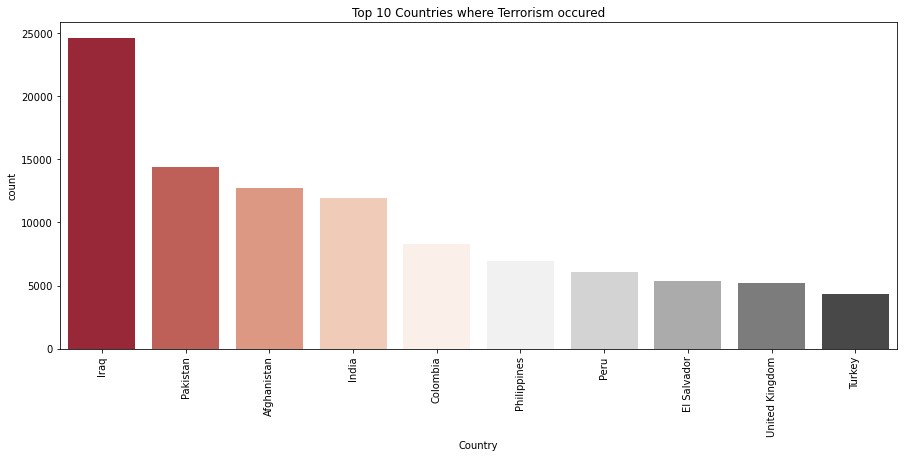

In [5]:
plt.figure(figsize=(15,6))
sns.countplot('Country', data=terror, palette='RdGy', order=terror['Country'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title('Top 10 Countries where Terrorism occured')
plt.show();

### 문제 3
```
문제 2의 전 세계 테러가 일어난 횟수별 상위 10위 국가에 대해 국가별로 사망자 수와 부상자 수를 구분하여 시각화하시오.

##### 데이터 다듬기

In [6]:
target_country = terror['Country'].value_counts()[:10].to_frame()
target_country.columns=['Attack']
target_country.head()

,Attack
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306


In [7]:
count_killed = terror.groupby('Country')['Killed'].sum().to_frame()
count_killed.head()

,Killed
Country,
Afghanistan,39384.0
Albania,42.0
Algeria,11066.0
Andorra,0.0
Angola,3043.0


In [8]:
count_wounded = terror.groupby('Country')['Wounded'].sum().to_frame()
count_wounded.head()

,Wounded
Country,
Afghanistan,44277.0
Albania,126.0
Algeria,9150.0
Andorra,0.0
Angola,2455.0


In [9]:
terror2 = pd.concat([target_country, count_killed, count_wounded], axis=1)
terror2

,Attack,Killed,Wounded
Iraq,24636.0,78589.0,134690.0
Pakistan,14368.0,23822.0,42038.0
Afghanistan,12731.0,39384.0,44277.0
India,11960.0,19341.0,28980.0
Colombia,8306.0,14698.0,10328.0
...,...,...,...
Yemen,NaN,8776.0,9328.0
Yugoslavia,NaN,119.0,281.0
Zaire,NaN,324.0,211.0
Zambia,NaN,70.0,62.0


In [10]:
terror2 = terror2[terror2['Attack'].notnull()]
terror2

,Attack,Killed,Wounded
Iraq,24636.0,78589.0,134690.0
Pakistan,14368.0,23822.0,42038.0
Afghanistan,12731.0,39384.0,44277.0
India,11960.0,19341.0,28980.0
Colombia,8306.0,14698.0,10328.0
Philippines,6908.0,9559.0,13367.0
Peru,6096.0,12771.0,4078.0
El Salvador,5320.0,12053.0,5062.0
United Kingdom,5235.0,3410.0,6106.0
Turkey,4292.0,6888.0,9899.0


## 질문
- concat으로 병합된 데이터 프레임에서 'Terrorism' 열을 drop 명령어로 삭제하려고 했는데 삭제되지 않는다. 그 이유는?

In [11]:
target_country = terror['Country'].value_counts()[:10].to_frame()
target_country.columns=['Attack']
count_wounded = terror.groupby('Country')['Wounded'].sum().to_frame()
count_killed = terror.groupby('Country')['Killed'].sum().to_frame()
terror2 = pd.concat([target_country, count_wounded, count_killed], axis=1)
terror2 = terror2[terror2['Attack'].notnull()]
terror2.head()

,Attack,Wounded,Killed
Iraq,24636.0,134690.0,78589.0
Pakistan,14368.0,42038.0,23822.0
Afghanistan,12731.0,44277.0,39384.0
India,11960.0,28980.0,19341.0
Colombia,8306.0,10328.0,14698.0


In [12]:
terror2.drop(columns=['Attack'])
terror2.head()

,Attack,Wounded,Killed
Iraq,24636.0,134690.0,78589.0
Pakistan,14368.0,42038.0,23822.0
Afghanistan,12731.0,44277.0,39384.0
India,11960.0,28980.0,19341.0
Colombia,8306.0,10328.0,14698.0


## 질문 끝 

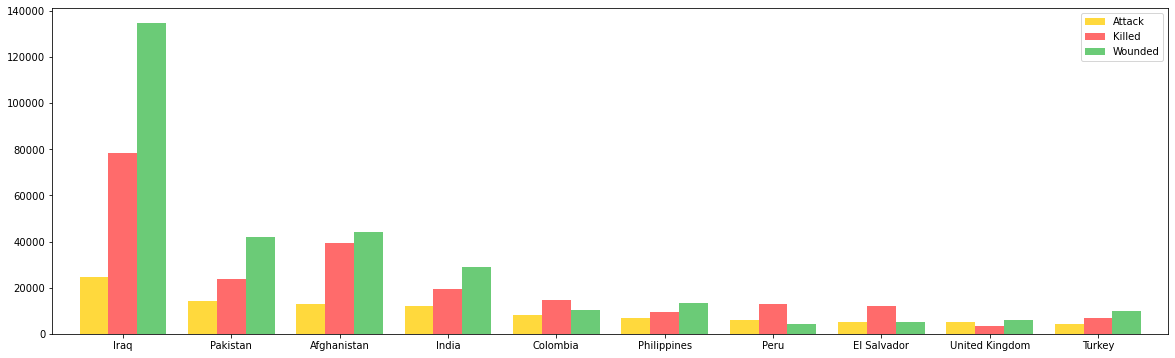

In [13]:
target_country = terror['Country'].value_counts()[:10].to_frame()
target_country.columns=['Attack']
count_wounded = terror.groupby('Country')['Wounded'].sum().to_frame()
count_killed = terror.groupby('Country')['Killed'].sum().to_frame()
terror2 = pd.concat([target_country, count_killed, count_wounded], axis=1)
terror2 = terror2[terror2['Attack'].notnull()].plot.bar(width=0.8, color=['#FFD93D', '#FF6B6B', '#6BCB77'])

fig=plt.gcf()
fig.set_size_inches(20,6)
plt.xticks(rotation=0)
plt.show()

- 대부분의 국가는 부상자 수가 사망자 수보다 높으나 콜롬비아와 페루, 엘살바도르는 사망자 수가 더 높다. 
- 특히 영국의 경우에는 테러 발생 횟수보다 사망자 수가 더 적음을 알 수 있다. 

### 문제 4
```
중동 & 북아프리카, 남아시아, 남아메리카, 서유럽, 남동아시아, 동유럽, 북아메리카, 동아시아 지역으로 구분하여 
각 지역별로 테러 공격 형태, 사망자와 사상자의 수 등에 대해 각 지역별로 특성들이 있는지를 확인하시오.

In [14]:
terror['Region'].unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

##### 데이터 다듬기

In [52]:
select_region = ['Middle East & North Africa', 'South Asia', 'South America', 'Western Europe', 'Southeast Asia', 'Eastern Europe', 'North America', 'East Asia']
terror_region = terror[terror['Region'].isin(select_region)]
terror.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualty
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment,0.0


##### 지역별 테러 공격 형태

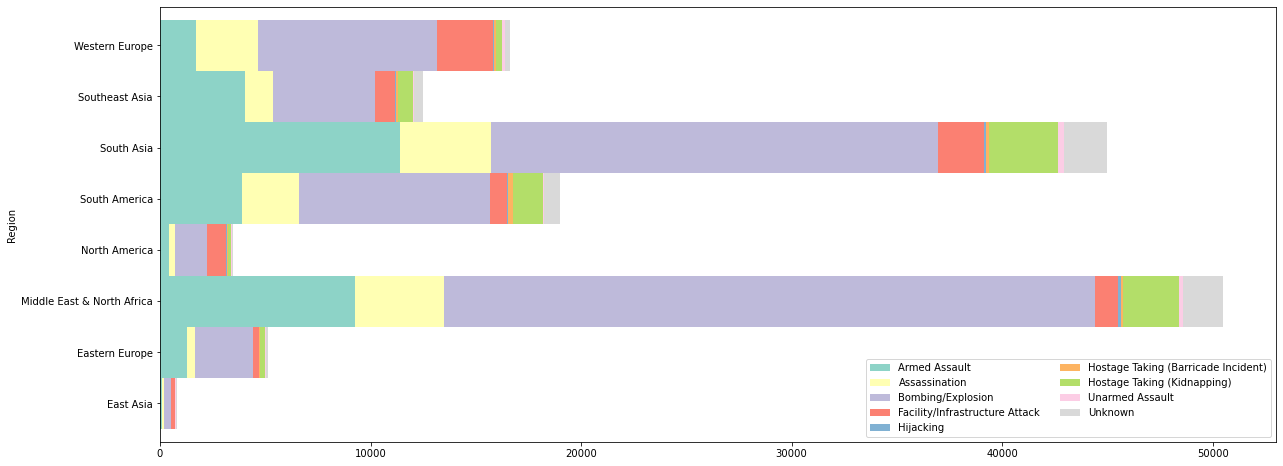

In [53]:
pd.crosstab(terror_region['Region'], terror_region.AttackType).plot.barh(stacked=True, width=1, color=sns.color_palette('Set3', 10))
fig=plt.gcf()
fig.set_size_inches(20,8)
plt.legend(loc='lower right', ncol=2)
plt.show()

##### 지역별 테러 공격 형태의 특성 분석

- 대부분 지역의 테러에서 가장 많은 비율을 차지하는 공격 형태는 폭탄이다.
- 폭탄 - 무기 - 암살 - 납치 등의 순으로 공격이 이뤄지는 양상이다. 

##### 지역별 사망자와 사상자 수

##### 데이터 다듬기

In [37]:
terror_casulty = terror[['Region','Killed','Wounded','casualty']]

wounded = terror_casulty.groupby('Region')['Wounded'].sum().to_frame()
killed = terror_casulty.groupby('Region')['Killed'].sum().to_frame()
casualty = terror_casulty.groupby('Region')['casualty'].sum().to_frame()

In [38]:
terror_casulty = pd.concat([killed, wounded, casualty], axis=1)
terror_casulty.head()

,Killed,Wounded,casualty
Region,,,
East Asia,1152.0,9213.0,10003.0
Eastern Europe,7415.0,12045.0,18239.0
Middle East & North Africa,137642.0,214308.0,329807.0
North America,4916.0,21531.0,26398.0
South America,28849.0,16704.0,43562.0


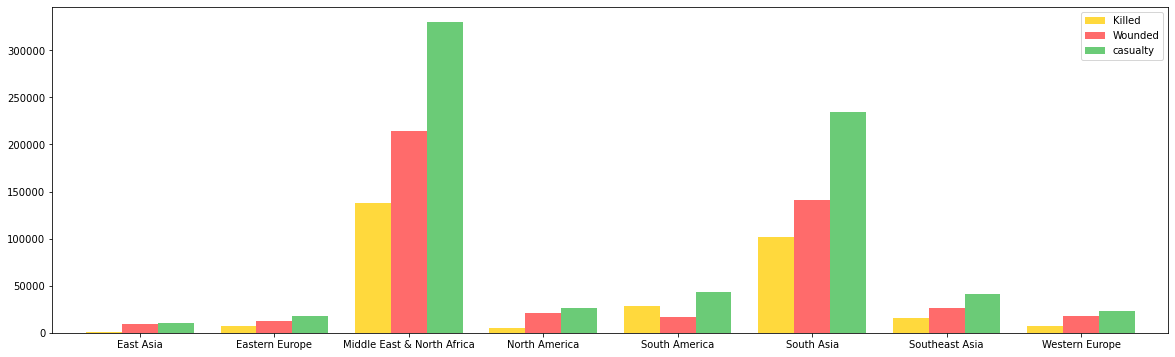

In [22]:
terror_casulty.plot.bar(width=0.8, color=['#FFD93D', '#FF6B6B', '#6BCB77'])

fig=plt.gcf()
fig.set_size_inches(20,6)
plt.xticks(rotation=0)
plt.legend(fontsize=10)
plt.xlabel('')
plt.show()

### 문제 5
```
중동 & 북아프리카, 남아시아, 남아메리카, 서유럽, 남동아시아, 동유럽, 북아메리카, 동아시아 지역으로 구분하여 진행한 문제 4번에 대해 
문제 1번에서 특정 지은 시기를 기준으로 다시 분리하여 테러의 양상을 분석해 보시오.

In [ ]:
terror_region


### 문제 6
```
중동 & 북아프리카, 남아시아, 남아메리카, 서유럽, 남동아시아, 동유럽, 북아메리카, 동아시아 지역으로 구분하여
70년대, 80년대, 90년대, 2000년대 , 2010년대로 구분하여 특성을 분석해 보시오. 

In [ ]:
terror_region = sns.load_dataset("terror_region")
terror_region = terror_region.pivot("month", "year", "passengers")
plt.figure(figsize=(10, 10))
ax = sns.heatmap(flights, annot=True, fmt="d")

### 문제 7
```
우리나라의 테러를 집계해서 나름대로의 방법으로 시각화 및 분석을 수행하시오.

##### 데이터 준비

In [56]:
terror3 = terror[terror['Country']=='South Korea']
terror3

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualty
2514,1974,8,15,South Korea,East Asia,Seoul,37.566535,126.977969,Assassination,1.0,0.0,"wife, Pres. Chung Hu Park",NaN,Korean Youth League,Government (General),Firearms,NaN,1.0
15734,1982,3,18,South Korea,East Asia,Busan,35.179554,129.075642,Facility/Infrastructure Attack,1.0,3.0,US Government Information Office,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,4.0
19820,1983,9,22,South Korea,East Asia,Daegu,35.871435,128.601445,Bombing/Explosion,1.0,4.0,US Cultural Center (housed in a 5 story building),NaN,Unknown,Government (Diplomatic),Explosives,NaN,5.0
29151,1986,9,14,South Korea,East Asia,Gimpo International Airport,37.558947,126.798341,Bombing/Explosion,5.0,19.0,Kimpo International Airport,NaN,Unknown,Airports & Aircraft,Explosives,NaN,24.0
29696,1986,12,15,South Korea,East Asia,Busan,35.179554,129.075642,Armed Assault,0.0,11.0,US Information Svce Bldg,NaN,Student Radicals,Government (General),Melee,NaN,11.0
33678,1988,3,4,South Korea,East Asia,Busan,35.179554,129.075642,Bombing/Explosion,0.0,0.0,Angel Coffee Shop,NaN,Unknown,Business,Explosives,NaN,0.0
33835,1988,3,18,South Korea,East Asia,Seoul,37.566535,126.977969,Facility/Infrastructure Attack,0.0,0.0,U.S. Engineering Unit,NaN,Unknown,Military,Incendiary,NaN,0.0
34532,1988,5,23,South Korea,East Asia,Gwangju,35.159545,126.852601,Facility/Infrastructure Attack,0.0,0.0,U.S. Information Service,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0.0
34562,1988,5,26,South Korea,East Asia,Seoul,37.566535,126.977969,Facility/Infrastructure Attack,0.0,0.0,Bank,NaN,Unknown,Business,Incendiary,NaN,0.0
34737,1988,6,13,South Korea,East Asia,Daegu,35.871435,128.601445,Facility/Infrastructure Attack,0.0,0.0,U.S. Cultural Center,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0.0


##### 연도별 테러 발생 건수 

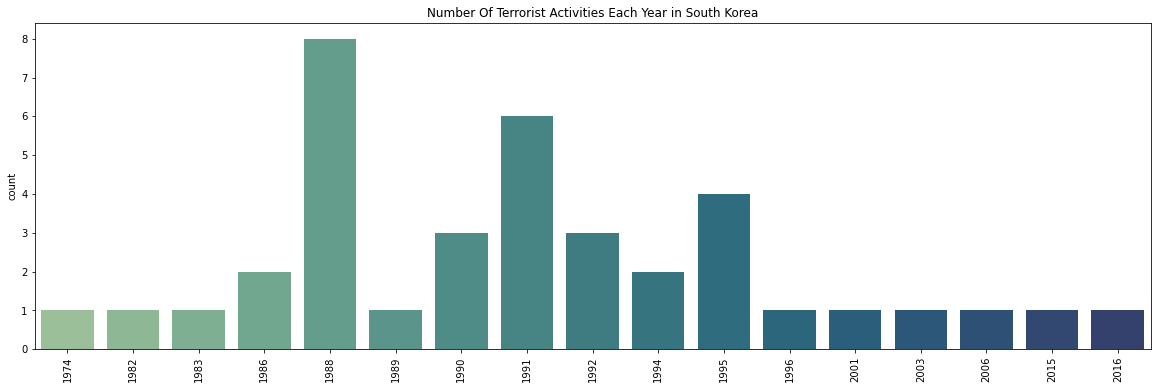

In [39]:
plt.subplots(figsize=(20,6))
sns.countplot('Year', data=terror3, palette='crest')
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year in South Korea')
plt.xlabel('')
plt.show()

##### 우리나라 연도별 테러발생 건수 분석

- 1988년에 8건으로 가장 많은 테러가 발생, 88올림픽과 관련이 있을까?


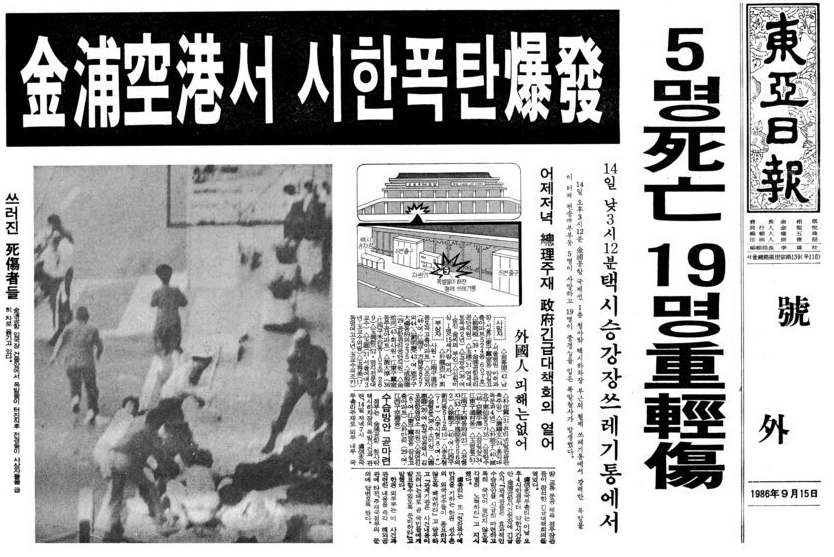

In [59]:
Image("../data/GimpoAirportTerror.png")

##### 연도별 사상자 수 분석 

##### 도시 별 테러 발생 현황 분석 

##### 테러 사용 무기 현황

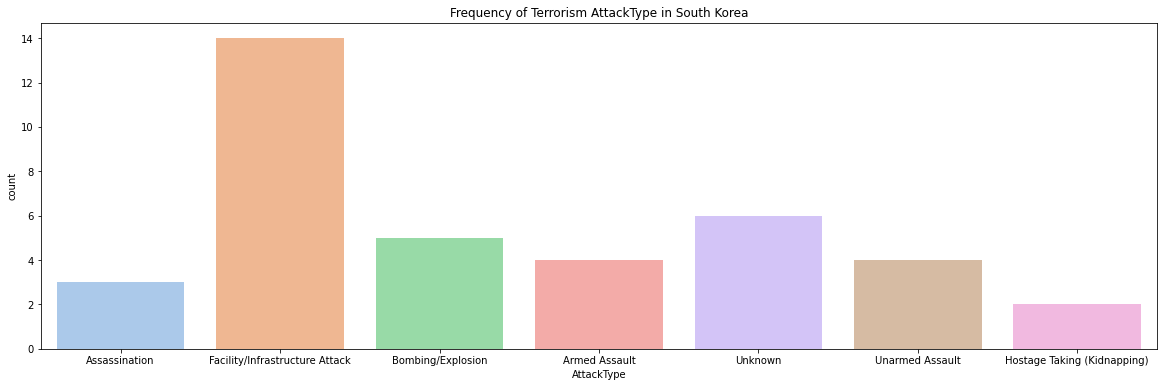

In [51]:
plt.figure(figsize=(20,6))
sns.countplot('AttackType', palette='pastel', data=terror3)
plt.xticks(rotation=0)
plt.title('Frequency of Terrorism AttackType in South Korea')
plt.show();